In [2]:
from geotool import tools
from geotool import raster

import inspect
from typing import AnyStr, Dict, Optional

from osgeo import gdal
import numpy as np

import earthpy.plot as ep

from rasterio import merge

import geopandas as gpd
import rasterio
from rasterio.mask import mask
from shapely.geometry import mapping

import rasterio
from rasterio.enums import Resampling

import os

import rasterio
from rasterio.enums import Resampling
from rasterio.warp import calculate_default_transform, reproject, Resampling

inspect.signature(tools.listFiles)
help(tools.listFiles)

In [3]:
src = raster.openRaster('./landsat_multi/')

Open landsat_img_test.tif 
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 2205, 'height': 815, 'count': 6, 'crs': CRS.from_epsg(32648), 'transform': Affine(30.0, 0.0, 581325.0,
       0.0, -30.0, 1145745.0)}


In [4]:
src.bounds

BoundingBox(left=581325.0, bottom=1121295.0, right=647475.0, top=1145745.0)

In [ ]:
def cropRaster(img: AnyStr, roi: AnyStr, maskout: bool= False):
    '''
    Crop and mask raster opened by rasterio by shapefile vector.

    Parameters:
        img: image raster file opened by rasterio
        roi: region of interest opened by geopandas 
    Example:
       img = rasterio.open('./landsat_multi/landsat_img_test.tif', 'r')
       roi = gpd.read_file('./roi/roi.shp')

       masked = raster.maskRaster(img, roi)

       import earthpy.plot as ep
       ep.plot_rgb(masked, stretch=True, rgb=(3,2,1))
    '''
    from rasterio import mask
    from shapely.geometry import mapping
    from shapely.geometry import box
    import geopandas as gpd

    if maskout is True:
        polys = roi
    else:
        minx, miny, maxx, maxy = roi.total_bounds
        bbox = box(minx, miny, maxx, maxy)
        polys = gpd.GeoDataFrame({'geometry': [bbox]}, crs=roi.crs)
    
    masked_img, geotranform = mask.mask(dataset=img, shapes=polys.geometry.apply(mapping), crop=True)
    
    return masked_img

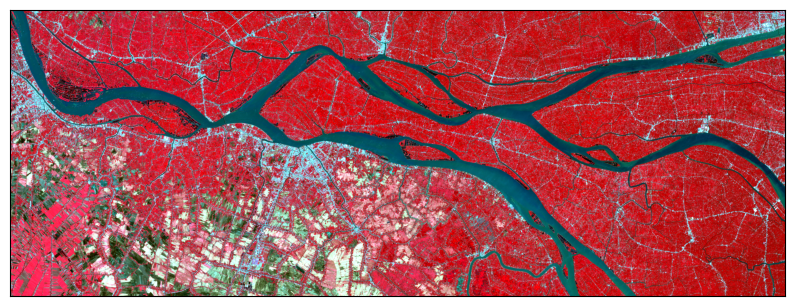

<Axes: >

In [95]:
ep.plot_rgb(src.read(), rgb=(3,2,1), stretch=True)

In [92]:
import rasterio
from rasterio.transform import from_origin
from rasterio.enums import Resampling

import numpy as np
import rasterio
from rasterio import Affine 
from rasterio.warp import reproject, Resampling

In [96]:
src_transform = src.transform
scale_factor = 
dst_transform = src_transform*Affine.translation(-src.width/2.0,  -src.height/2.0)*Affine.scale(2.0)

data = src.read()


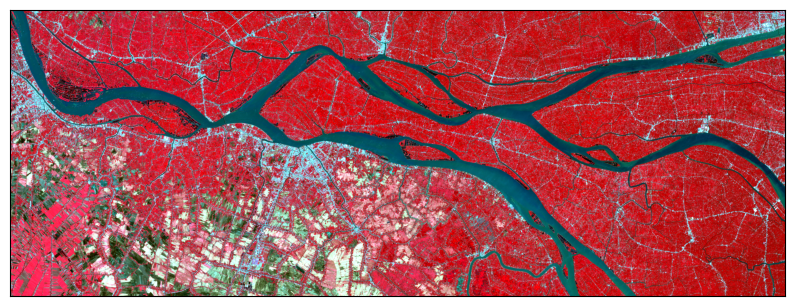

<Axes: >

In [90]:
ep.plot_rgb(out, rgb=(3,2,1), stretch=True)

In [ ]:


with rasterio.open('rasterio/tests/data/RGB.byte.tif') as src:
    src_transform = src.transform

    # Zoom out by a factor of 2 from the center of the source
    # dataset. The destination transform is the product of the
    # source transform, a translation down and to the right, and
    # a scaling.
    dst_transform = src_transform*A.translation(
        -src.width/2.0, -src.height/2.0)*A.scale(2.0)

    data = src.read()

    kwargs = src.meta
    kwargs['transform'] = dst_transform

    with rasterio.open('/tmp/zoomed-out.tif', 'w', **kwargs) as dst:

        for i, band in enumerate(data, 1):
            dest = np.zeros_like(band)

            reproject(
                band,
                dest,
                src_transform=src_transform,
                src_crs=src.crs,
                dst_transform=dst_transform,
                dst_crs=src.crs,
                resampling=Resampling.nearest)

            dst.write(dest, indexes=i)